# 선형 회귀
## 선형 회귀, 계수 또는 가중치, 모델 파라미터, 다항 회귀
kNN regression과 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러 가지 선형 회귀 모델을 만들어보기

❓ch03_1에서 만든 모델에 길이가 매우 큰 농어의 무게를 예측했는데, 저울에 나온 농어의 무게와 큰 차이가 발생했다

## kNN의 한계

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0,
       840.0, 685.0, 700.0, 700.0, 690.0, 900.0,  650.0, 820.0, 850.0, 900.0, 1015.0, 
       820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [3]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [4]:
# 최근접 이웃 개수 3으로 하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print(knr.predict([[50]]))

[1033.33333333]


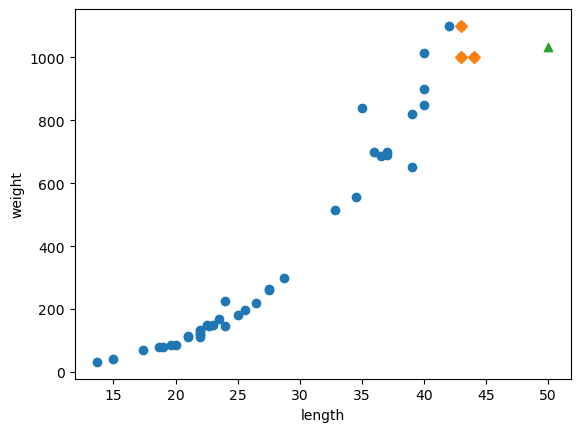

In [6]:
import matplotlib.pyplot as plt

# 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)

# 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 커질수록 농어의 무게가 증가하는 경향이 있지만, 50cm농어에서 가장 가까운 것은 45cm 근방이기 때문에 k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균낸다. (50cm보다 꽤 작은 45cm근방의 평균을 계산해서 50cm를 예측하게 되는 셈!) 50cm 데이터는 없고, 가장 가까운 샘플을 찾아 타깃을 평균내기 때문에 문제가 된다. 

📍즉, 새로운 샘플이 훈련 데이터 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다!

In [7]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [8]:
# 길이를 100으로 해도 똑같이 예측
print(knr.predict([[100]]))

[1033.33333333]


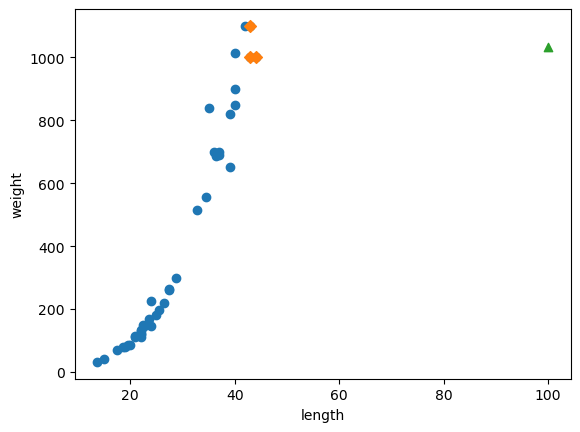

In [9]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

📌 머신러닝 모델은 주기적으로 훈련해야 한다.

    한 번 만들고 끝나는 프로그램이 아니다. 시간과 환경이 변화하면서 데이터도 바뀌기 때문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야 한다. 
    
e.g. 배달 음식이 도착하는 시간을 예측하는 모델은 배달원이 바뀌거나 도로 환경이 변할 수 있기 때문에 새로운 데이터를 사용해 반복적으로 훈련해야 한다.

## 선형 회귀
특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는다. 특성이 하나면 직선 방정식이다.

선형 회귀가 찾은 특성과 타깃 사이의 관계는 선형 방정식의 계수와 가중치에 저장된다. 머신러닝에서 가중치는 방정식의 기울기와 절편을 모두 의미하는 경우가 많다. 

### 모델 파라미터
모델 파라미터는 선형 회귀가 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터이다. 

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


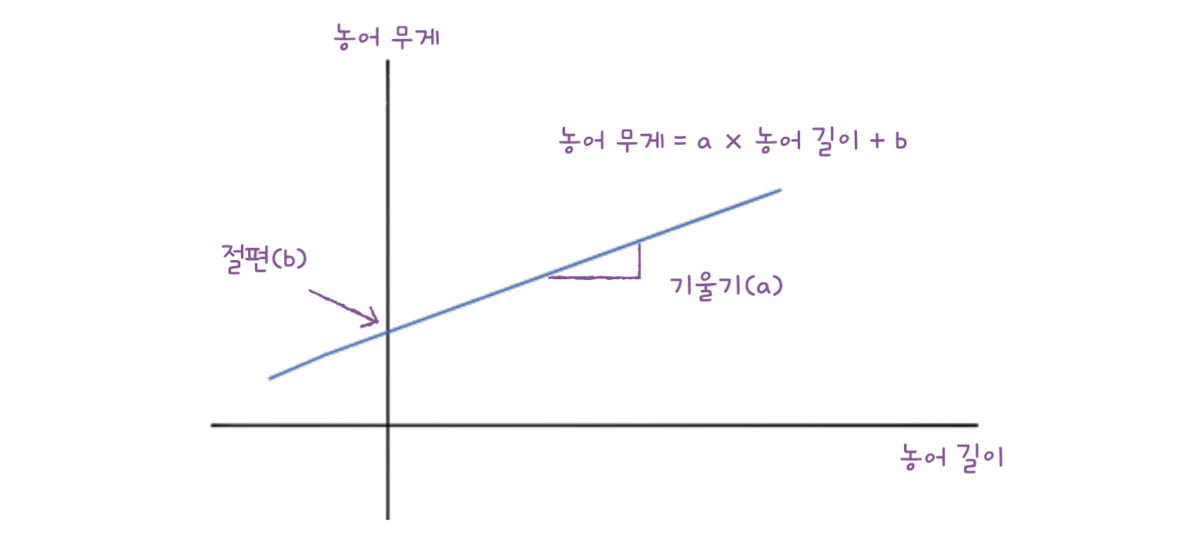

### coef_, intercept_
위의 linearRegression 클래스가 찾은 기울기와 절편은 lr객체의 coef_와 intercept_속성에 저장되어 있다. 

    머신러닝 알고리즘이 찾은 값이라는 의미로 모델 파라미터라고 부른다. 많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. 이를 모델 기반 학습이라고 한다. 
    
- 앞서 사용한 KNN에는 모델 파라미터가 없다. 훈련 세트를 저장하는 것이 훈련의 전부는데, 이를 <u>사례 기반 학습</u>이라고 한다. 

📍coef_ 속성 이름에서 알 수 있듯이, 머신러닝에서 기울기를 계수(coefficient) 또는 가중치(weight)라고 부른다. 

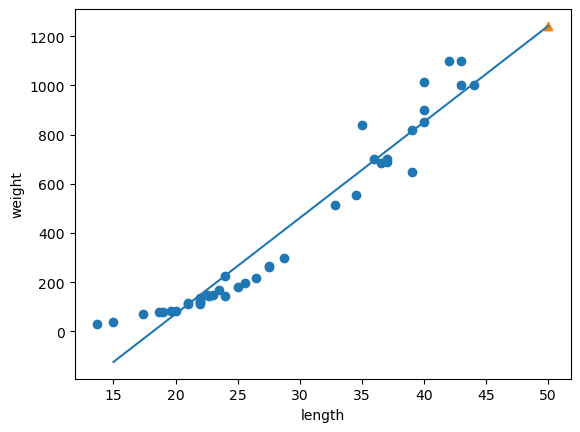

In [16]:
# 농어의 길이 15에서 50까지 직선으로 그려보기
# 앞에서 구한 기울기와 절편을 사용하여 (15, )  (50, ) 두 점을 이으면 된다. 
plt.scatter(train_input, train_target)

# 15부터 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위의 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다.

In [17]:
# 훈련 세트와 테스트 세트에 대한 상관계수 점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


1. 훈련 세트에 과대적합되었다기보다 전체적으로 과소적합되었다고 볼 수 있다. 

2. 선형 회귀가 만든 직선은 왼쪽 아래로 쭉 뻗어 있는데, 이 직선대로 에측하면 농어의 무게가 0g이하로 내려간다. 이는 현실에서 있을 수 없는 일!

📌 농어의 길이와 무게에 대한 산점도를 보면 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선인데, 최적의 직선을 찾기보다는 최적의 곡선을 찾는 것이 좋은 방법이다. 

## 다항 회귀
다항식을 사용하여 특성과 타깃 사이의 관계를 나타내는데, 이 함수는 비선형일 수 있지만 선형 회귀로 표현이 가능하다.

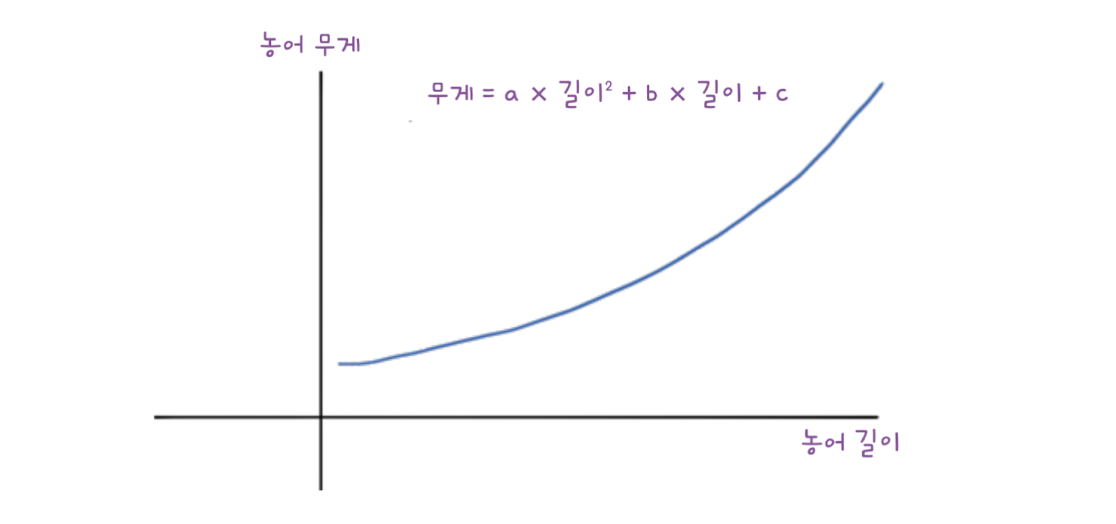

---
위의 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 하는데, 넘파이를 사용하면 쉽게 만들 수 있다. 
- column_stack()을 이용해 train_input 제곱한 것과 train_input 배열을 나란히 붙이면 된다. 

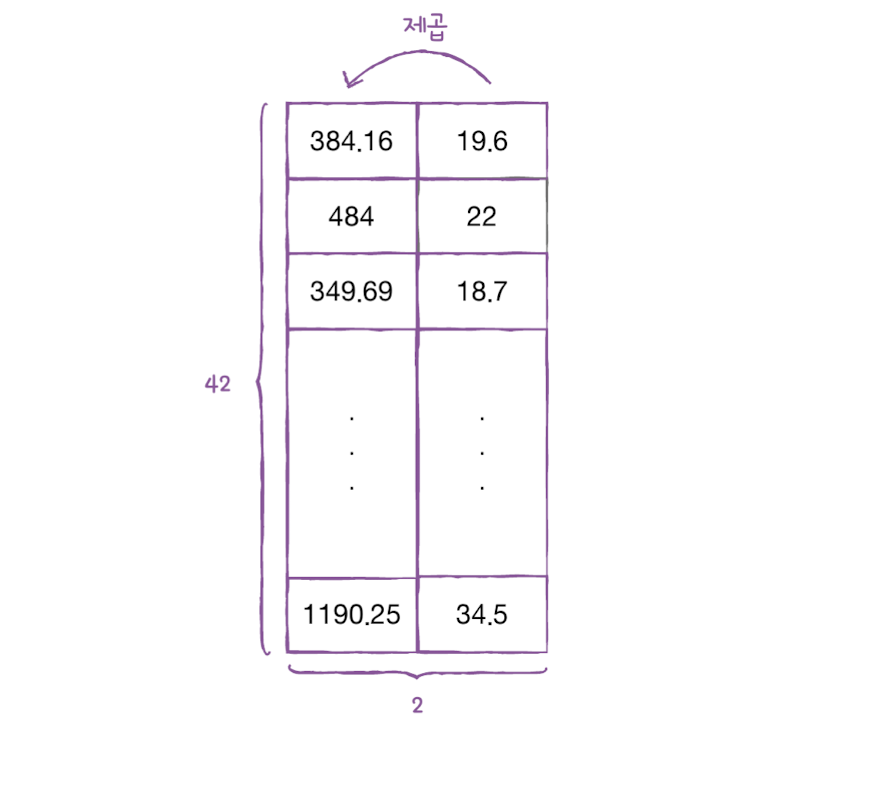

In [18]:
# column_stack()이용해 배열 붙이기
# 넘파이 브로드캐스팅 적용돼 모든 원소를 제곱해준다. 
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [19]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


⬆️원래 특성인 length를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났다. 

📍2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용

    목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다! 

In [20]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [21]:
# 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


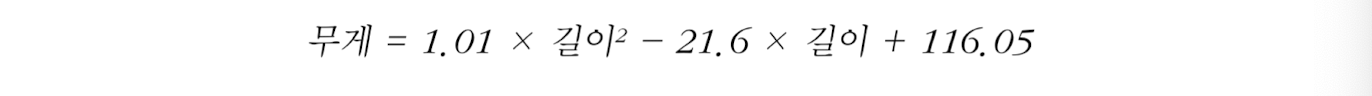

❓이차 방정식도 선형 회귀??

❗️길이<sup>2</sup> 을 간단히 다른 변수로 치환할 수 있기 때문에 선형 관계로 표현이 가능하다. 

💡이런 방정식을 다항식(polynomial)이라 부르며 다항식을 사용한 선형 회귀를 다항 회귀라고 한다. 

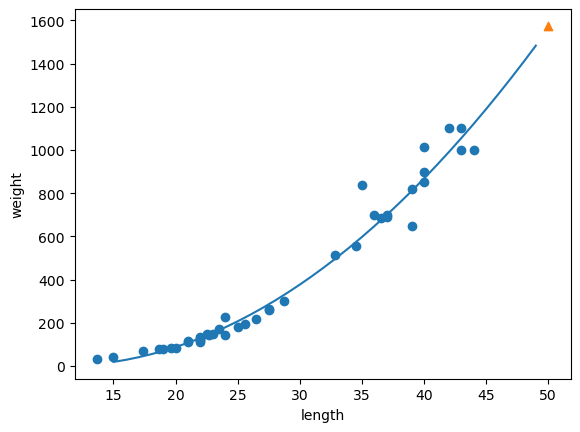

In [22]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기
# 짧은 직선을 이어 그리면 곡선처럼 표현할 수 있다. 

point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그리기
# 위의 코드셀에서 확인한 계수와 절편 이용
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
# 상관계수 점수 평가하기
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


❓훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌지만 아직 테스트 세트의 점수가 더 높아 과소적합이 아직 남아있다. 

❗️조금 더 복잡한 모델이 필요하겠군!

## 핵심 패키지와 함수
### scikit-learn
- fit_intercept 매개변수를 False로 지정하면 절편을 학습하지 않는다. 
    - 기본값은 True이다. 
- 학습된 모델의 coef_속성은 특성에 대한 계수(기울기) 배열이다.
    - 배열의 크기는 특성의 개수와 같다. 
- intercept_에는 절편이 저장